# Bike Sharing

## Business Problem
---
Gaya hidup yang sehat banyak diminati kebanyakan orang, dari yang muda sampai yang tua. Sering berolah raga merupakan gaya hidup yang sehat. Salah satu cara untuk berolah raga adalah dengan bersepeda. Peminat pesepeda pun semakin banyak, dengan beragamnya jenis sepeda yang beredar di masyarakat. Bersepeda merupakan aktivitas yang dilakukan diluar ruangan. Oleh karena itu, cuaca, musim dan kondisi diluar ruangan mempengaruhi jumlah pesepeda yang berada di jalanan.

## Goals
---
Data set yang digunakan adalah data bike sharing, dimana data ini digunakan untuk memprediksi jumlah penyewa sepeda pada setiap musim.

## Machine Learning
---
Pada proses pembuatan machine learning sebelumnya perlu dilakukan dulu `data cleaning`, `feature selection` dan `feature engineering`.
Pada Machine Learning yang dibuat ini menggunakan Regresi / Regression yang dimana pada hasil akhirnya akan menghasilkan prediksi jumlah sepeda yang disewa yang akan ditampilkan dengan berbagai features akan akan di input oleh user.
Lalu pada proses pembuatan machine learning kali ini menggunakan metode **Pipeline**.

## Penggunaan Model
---
Untuk Model yang digunakan terdapat 4 model yaitu:

- Support Vector Regression (SVR)
- K-Nearest Neighbors (KNN)
- Decision Tree (DTree)
- Random Forest (RF)

Dari ke 4 model tersebut nantinya model base terbaik akan dilakukan Tuning sehingga akan menghasilkan nilai yang lebih baik dalam memprediksi hasil yang diinginkan.

## Conclusion dan Recommendation
---
Setelah model terbaik di Tuning maka akan terlihat perbedaannya, lalu setelah itu dilakukan pengecekan Error untuk melihat kapan model dapat dipercaya dan kapan model tidak dapat dipercaya, setelah itu dapat di lakukan:
- Conclusion, yang mana menarik kesimpulan dari Machine Learning yang telah dibuat
- Recommendation, yang mana memberi rekomendasi berdasarkan dari Conclusion yang ada, tujuannya agar dapat meningkatkan Prediksi Machine Learning yang telah dibuat agar lebih tepat dengan Error yang sedikit.

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,12/9/2011,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,6/17/2012,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,6/15/2011,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,3/31/2012,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,7/31/2012,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **Data Understanding**

In [3]:
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,dteday,object,0,0.0,731,"[11/18/2012, 8/13/2012]"
1,hum,float64,0,0.0,89,"[0.97, 0.45]"
2,weathersit,int64,0,0.0,4,"[3, 1]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 4]"
5,atemp,float64,0,0.0,65,"[0.2879, 0.8485]"
6,temp,float64,0,0.0,50,"[0.66, 0.44]"
7,hr,int64,0,0.0,24,"[19, 3]"
8,casual,int64,0,0.0,305,"[184, 290]"
9,registered,int64,0,0.0,742,"[321, 80]"


In [4]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [5]:
pickup_dt = df['dteday'].dt

In [6]:
df['year'] = pickup_dt.year ## mengambil tahun
df['month'] = pickup_dt.month ## mengambil bulan
df['date'] = pickup_dt.day ## mengambil tanggal

In [7]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,date
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31


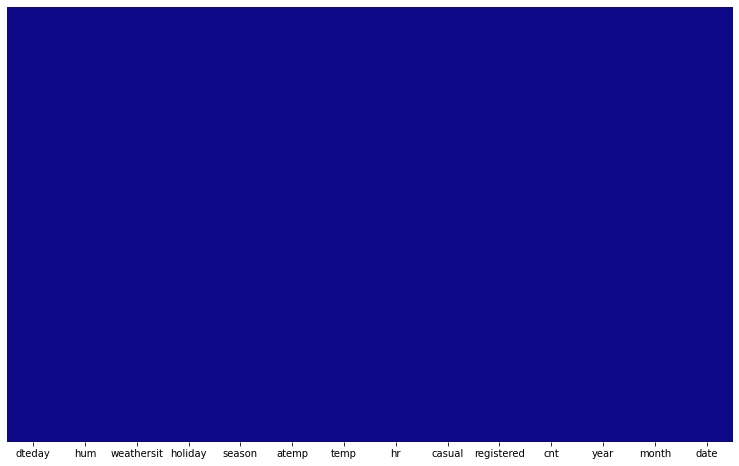

In [8]:
# Pengecekan Missing Value dengan Heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(), cmap='plasma', cbar=False, yticklabels=False)
plt.show()

In [9]:
# tidak ada missing value

In [10]:
## Mengatasi Missing Value
df.dropna(inplace=True)

In [11]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
year          0
month         0
date          0
dtype: int64

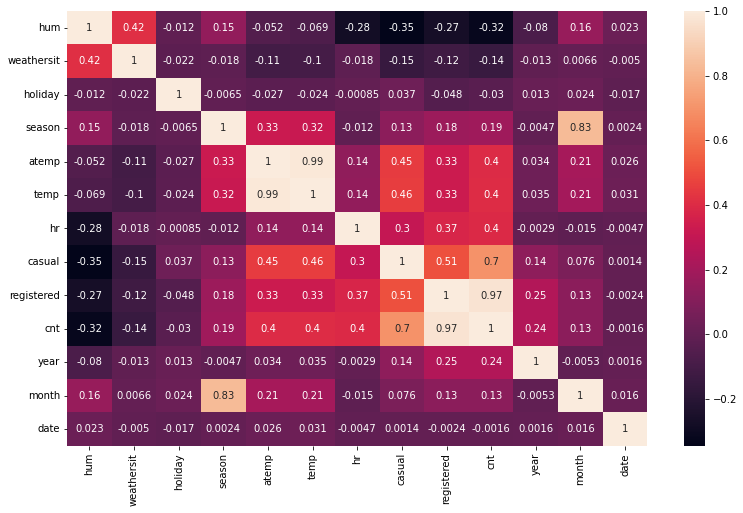

In [12]:
# Pengecekan Korelasi
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

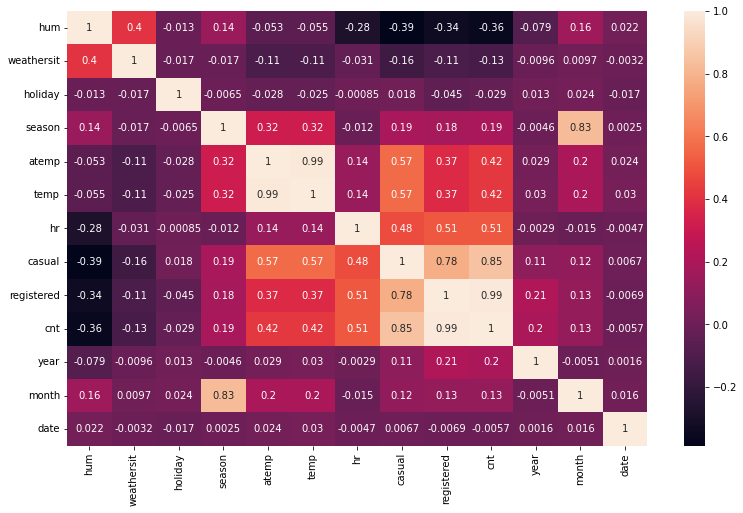

In [13]:
# Pengecekan Korelasi dengan Spearman
plt.figure(figsize=(13,8))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [14]:
# Membuat Sub-Data
df_1 = df.drop(columns=['holiday', 'dteday'])

Kolom holiday di drop karena memiliki korelasi yang rendah, dan kolom dteday di drop karena sudah di buat kolom baru

### Splitting Data

In [15]:
X = df_1.drop(columns=['cnt'])
y = df_1['cnt']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20, random_state=42)

In [17]:
X_train.head()

,hum,weathersit,season,atemp,temp,hr,casual,registered,year,month,date
10288,0.83,3,3,0.5758,0.62,20,65,176,2012,8,25
5587,0.62,1,1,0.4394,0.44,1,3,15,2012,2,24
4147,0.51,1,1,0.2273,0.22,3,0,1,2012,3,5
5257,0.35,1,3,0.7879,0.88,18,91,248,2012,6,30
2628,0.79,1,3,0.6970,0.72,2,1,7,2012,9,6


### Modelling

In [18]:
pd.options.display.float_format = '{:.2f}'.format

In [19]:
def Eva_Matrix_DF(Model,X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

### Membuat Pipeline Model

In [20]:
# Pipeline yang Modelnya menggunakan Scaller
num_columns = ['hum', 'weathersit', 'season', 'atemp', 'temp', 'hr', 'casual', 'registered']
cat_columns = []

numeric_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_SVR = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR())
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [21]:
# Pipeline yang Modelnya tidak menggunakan Scaller
num_columns = ['hum', 'weathersit', 'season', 'atemp', 'temp', 'hr', 'casual', 'registered']
cat_columns = []

numeric_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_DTree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [22]:
# Mentraining Data
dfbase = [pipe_SVR, pipe_KNN, pipe_DTree, pipe_RF]

for i in dfbase:
    i.fit(X_train, y_train)

In [23]:
# Evaluasion Matrix
df_SVR_base = Eva_Matrix_DF(pipe_SVR, X_train, X_test, y_train, y_test, 'Base SVR')
df_KNN_base = Eva_Matrix_DF(pipe_KNN, X_train, X_test, y_train, y_test, 'Base KNN')
df_DTree_base = Eva_Matrix_DF(pipe_DTree, X_train, X_test, y_train, y_test, 'Base DTree')
df_RF_base = Eva_Matrix_DF(pipe_RF, X_train, X_test, y_train, y_test, 'Base RF')

In [24]:
# Menampilkan Hasil Evaluasi Matrix
df_all = pd.concat([df_SVR_base, df_KNN_base, df_DTree_base, df_RF_base], axis=1)
df_all

,TrainingBase SVR,TestingBase SVR,TrainingBase KNN,TestingBase KNN,TrainingBase DTree,TestingBase DTree,TrainingBase RF,TestingBase RF
R2,-0.06,-0.05,0.97,0.95,1.00,1.00,1.00,1.00
MAE,138.56,133.93,19.79,25.75,0.00,2.66,0.53,1.38
MSE,35326.36,32571.89,937.73,1558.52,0.00,37.58,1.77,12.70
RMSE,187.95,180.48,30.62,39.48,0.00,6.13,1.33,3.56


### Dapat dilihat dari Nilai yang sudah ada bahwa:
- Model dengan Nilai RMSE terbaik adalah Model Random Forest
- Model tersebut memiliki nilai RMSE yang lebih rendah dibandingkan dengan Model lain, sehingga perlu dilakukan Hyper Parameter Tuning
- Model dengan Nilai terburuk adalah Model SVR dengan hasil nilai RMSE yang tinggi
- Model yang akan dilakukan Tunning adalah Random Forest

# Improvement

In [25]:
# Menampilkan parameter yang dapat digunakan
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('poly',
                                                     PolynomialFeatures(degree=3,
                                                                        include_bias=False)),
                                                    ('power',
                                                     PowerTransformer())]),
                                    ['hum', 'weathersit', 'season', 'atemp',
                                     'temp', 'hr', 'casual', 'registered']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first'))]),
                                    [])])),
  ('algo', RandomForestRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(remainder='passthr

In [26]:
# Kedalaman pohon
max_depth = list(np.arange(1, 200))

# Jumlah pohon
n_estimators = list(np.arange(100, 301))

# Hyperparam space Random Forest
param_RF = {
    'algo__max_depth': max_depth, 
    'algo__n_estimators': n_estimators,
}

In [27]:
RS_RF = RandomizedSearchCV(pipe_RF, param_RF, cv = 4, n_jobs=-1, verbose=1, scoring ='neg_root_mean_squared_error', n_iter=100)

Alasan saya menggunakan Randomized Search karena jika memakai Grid Search terlalu banyak jumlah kombinasi yang dapat mengakibatkan device crash, sehingga agar lebih optimal menggunakan Randomized Search

In [28]:
RS_RF.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=3,
                                                                                                                   include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['hum',
                                                                 

In [29]:
RF_Tuned = RS_RF.best_estimator_

In [30]:
df_RF = Eva_Matrix_DF(RF_Tuned, X_train, X_test, y_train, y_test, 'RF Boost Tuned')
df_RF

,TrainingRF Boost Tuned,TestingRF Boost Tuned
R2,1.00,1.00
MAE,0.50,1.33
MSE,1.63,12.55
RMSE,1.28,3.54


### Hasil Akhir

In [31]:
# Menampilkan hasil Evaluation Matrix dengan menggabungkan model terbaik sebelum data sesudah di Tunning
df_tuned = pd.concat([df_RF_base, df_RF], axis=1)
df_tuned

,TrainingBase RF,TestingBase RF,TrainingRF Boost Tuned,TestingRF Boost Tuned
R2,1.00,1.00,1.00,1.00
MAE,0.53,1.38,0.50,1.33
MSE,1.77,12.70,1.63,12.55
RMSE,1.33,3.56,1.28,3.54


Dari hasil yang sudah dapat dilihat ini nilai R2= 1, dari sini dapat dikatakan fit modelnya bagus. 

### Analisis Error untuk model terbaik

In [32]:
y_pred=RS_RF.predict(X_test)

In [33]:
# Pengecekan Nilai Error
error = abs(y_pred-y_test)
pd.DataFrame(error).head()

,cnt
8522,0.26
4046,0.00
8297,0.10
7118,0.20
10258,0.12


In [34]:
X_test['error'] = error

In [35]:
X_test.sort_values('error', ascending=False).head(10)

,hum,weathersit,season,atemp,temp,hr,casual,registered,year,month,date,error
11467,0.31,1,2,0.45,0.46,14,240,109,2011,4,3,56.31
1768,0.55,1,1,0.14,0.16,8,5,349,2012,1,3,55.33
5514,0.43,1,4,0.53,0.56,12,250,526,2012,9,23,44.50
6651,0.53,1,1,0.62,0.62,14,352,338,2012,3,17,34.38
8937,0.38,1,2,0.62,0.64,18,99,570,2012,5,18,33.12
4436,0.49,2,4,0.53,0.56,18,57,787,2012,10,10,31.79
9455,0.72,2,4,0.48,0.50,18,26,758,2012,10,9,31.63
6887,0.73,1,2,0.53,0.56,18,43,770,2012,5,2,28.62
1783,0.59,1,4,0.50,0.52,18,90,794,2012,10,17,26.75
6545,0.30,1,4,0.55,0.58,17,89,809,2012,9,24,24.83


Dari hasil error yang ditampilkan, hasil error terbesar dengan nilai error 56.31 

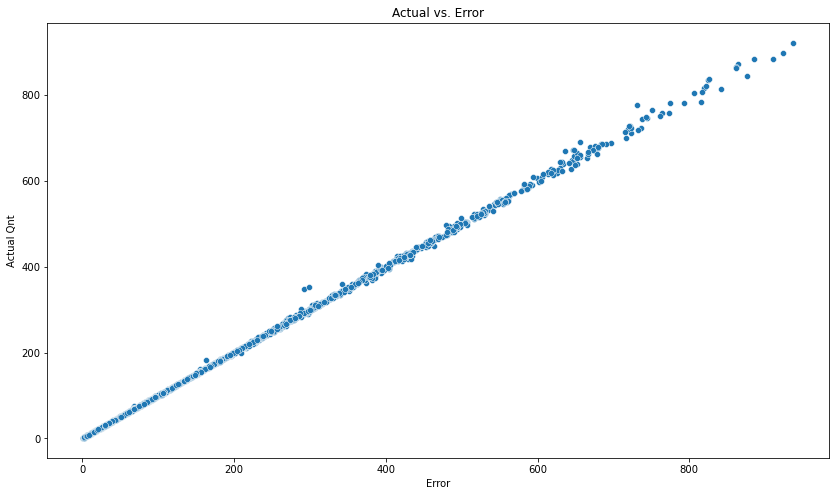

In [40]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_pred, y=y_test).set(title='Actual vs. Error', 
                                               xlabel='Error', 
                                               ylabel='Actual Qnt');

 Dari grafik scterplot yang dapat dilihat itu hubungan prediksi dengan total sewa dengan aktual total sewa memiliki hubungan positif dan nilai errornya tidak besar (kecil). Bahwa model yang sudah dibuat dapat digunakan sebagai acuan untuk memprediksi total sewa selanjutnya.

## Conclusion

Dari data bike sharing, data type waktu yang tadinya objek diganti ke format waktu yang sebenarnya menjadi lebih detail dan meminimalisir nilai error. Lalu, kolom holiday memiliki korelasi yang rendah sehingga tidak terlalu mempengaruhi tingkat sewa sepeda.

## Recommendation

Menambahkan data yang lebih valid agar hasil yang didapat juga semakin bagus dan menambahkan jumlah Features agar nilai yang dihasilkan dari Machine Learning juga semakin baik.

# Thankyou!!!